<a href="https://colab.research.google.com/github/namvux1404/Anomalies-detection---Vector-workshop/blob/BLYY123-patch-1/testrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download the GDN code from gitHub

In [1]:
!git clone https://github.com/d-ailin/GDN.git

Cloning into 'GDN'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 54 (delta 10), reused 6 (delta 6), pack-reused 27
Receiving objects: 100% (54/54), 473.31 KiB | 4.64 MiB/s, done.
Resolving deltas: 100% (13/13), done.


Update python file due to Pytorch-geometric lib version issue from our folder

In [2]:
!git clone https://github.com/namvux1404/Anomalies-detection---Vector-workshop.git

Cloning into 'Anomalies-detection---Vector-workshop'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 56 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (56/56), 457.20 KiB | 3.44 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [3]:
#modify graph_layer.py
%cp /content/Anomalies-detection---Vector-workshop/modified_pyFile/graph_layer.py /content/GDN/models/graph_layer.py

Install necessary libs for GDN

In [4]:
import os
os.chdir('./GDN/')

In [5]:
import torch
## check PyTorch version
print(torch.__version__)

2.0.1+cu118


In [6]:
!pip install torch_geometric
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=612c416b9922d48c286ff3560aa245edd7cdb647cfdd0f6967a8d393b7d9d432
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 75.1 MB/s eta 0:00:00


Install Kaleido lib for plotly fig saving

In [34]:
!pip install -U kaleido

# Explore the training and testing set

In [35]:
import pandas as pd
import plotly.express as px
import os

## define the folder to save figs
if not os.path.exists("images"):
  os.mkdir("images")

In [36]:
## read training set and plot the time-series data for four sensors
df_train = pd.read_csv('./data/msl/train.csv',sep=',')
fig_train = px.line(df_train, x=list(df_train.columns)[0], y= list(df_train.columns)[1:5])
fig_train.show()
fig_train.write_image("images/train_explore.png")

Load test set

In [37]:
df_test= pd.read_csv('./data/msl/test.csv',sep=',')

M-6 point anonymous

In [38]:
## attack labesl for each sensor is obtained from here
## https://github.com/khundman/telemanom/blob/master/labeled_anomalies.csv

## M-6 is point anonymous, anomalies are highlighted with blue circles
anonymous_sequence = [1850, 2030]

fig_m6 = px.line(df_test, x=list(df_test.columns)[0], y= list(df_test.columns)[1:2])
num_row = df_test['M-6'].count()
fig_m6.add_scatter(x=list(range(anonymous_sequence[0], min(anonymous_sequence[1], num_row)+1)),
                   y=df_test[(df_test['timestamp']>=anonymous_sequence[0])&(df_test['timestamp']<=anonymous_sequence[1])]['M-6'].tolist(),
                   mode='markers', marker=dict(size=10, color='Blue'), name='anonymous')
fig_m6.show()
fig_m6.write_image("images/test_explore_M6.png")

M-2 contextual anonymous

In [59]:
## M-2 is contextual anonymous

anonymous_sequence = [1110, 2250]

fig_m2 = px.line(df_test, x=list(df_test.columns)[0], y= list(df_test.columns)[3:4])
num_row = df_test['M-2'].count()
fig_m2.add_scatter(x=list(range(anonymous_sequence[0], min(anonymous_sequence[1], num_row)+1)),
                   y=df_test[(df_test['timestamp']>=anonymous_sequence[0])&(df_test['timestamp']<=anonymous_sequence[1])]['M-2'].tolist(),
                   mode='markers', marker=dict(size=10, color='Blue'), name='anonymous')
fig_m2.show()
fig_m2.write_image("images/test_explore_M2.png")

S-2 point anonymous

In [40]:
## S-2 is point anonymous
anonymous_sequence = [900, 910]

fig_s2= px.line(df_test, x=list(df_test.columns)[0], y= list(df_test.columns)[4:5])
num_row = df_test['S-2'].count()
fig_s2.add_scatter(x=list(range(anonymous_sequence[0], min(anonymous_sequence[1], num_row)+1)),
                   y=df_test[(df_test['timestamp']>=anonymous_sequence[0])&(df_test['timestamp']<=anonymous_sequence[1])]['S-2'].tolist(),
                   mode='markers', marker=dict(size=10, color='Blue'), name='anonymous')
fig_s2.show()
fig_s2.write_image("images/test_explore_S6.png")

# Run the training examples

Install the lib to save plotly figs

In [57]:
!bash run.sh 0 msl

/content/GDN/models/GDN.py:161: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  gated_i = torch.arange(0, node_num).T.unsqueeze(1).repeat(1, topk_num).flatten().to(device).unsqueeze(0)
epoch (0 / 30) (Loss:0.46357875, ACU_loss:18.07957137)
epoch (1 / 30) (Loss:0.27831617, ACU_loss:10.85433073)
epoch (2 / 30) (Loss:0.23245515, ACU_loss:9.06575090)
epoch (3 / 30) (Loss:0.21231870, ACU_loss:8.28042917)
epoch (4 / 30) (Loss:0.19132835, ACU_loss:7.46180564)
epoch (5 / 30) (Loss:0.17451125, ACU_loss:6.80593869)
epoch (6 / 30) (Loss:0.17282238, ACU_loss:6.74007298)
epoch (7 / 30) (Loss:0.16401211, ACU_loss:6.39647242)
epoch (8 / 30) (Loss:0.15154169, ACU_loss:5.91012602)
epoch (9 / 

# Show the saved embedding figure

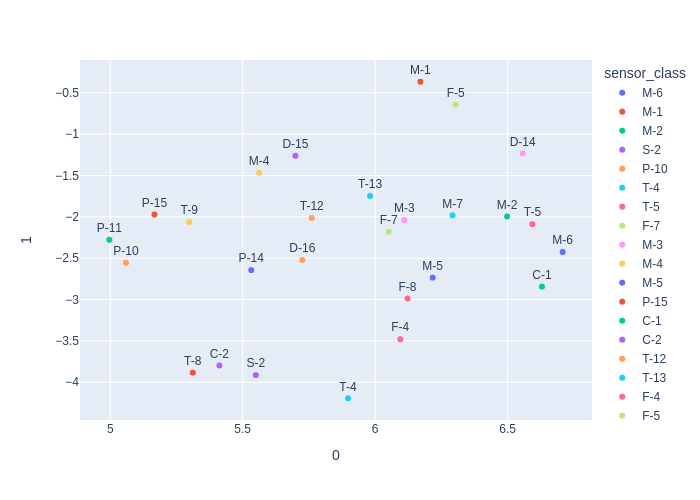

In [58]:
from PIL import Image
im = Image.open("images/test_embedding.png")
im

In [51]:
from sklearn.manifold import TSNE
import plotly.express as px

df = px.data.iris()

df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3
